# **Activity Detection**

Part 2

Data source: https://www.kaggle.com/datasets/luisomoreau/activity-detection

Our data consists of 12 folders, where each folder represents one activity. In each folder (except one), there are 12 CSV files with data. Each CSV file corresponds to one sensor that recorded the data. A description of the files with their values is provided below.

**Acceleration (Accelerometer)**
- Accelerometer_z: Acceleration along the Z-axis.
- Accelerometer_y: Acceleration along the Y-axis.
- Accelerometer_x: Acceleration along the X-axis.

**Annotation** - empty  


**Gravity**
- Gravity_z: Gravity vector component along the Z-axis.
- Gravity_y: Gravity vector component along the Y-axis.
- Gravity_x: Gravity vector component along the X-axis.

**Gyroscope**
- Gyroscope_z: Angular velocity around the Z-axis.
- Gyroscope_y: Angular velocity around the Y-axis.
- Gyroscope_x: Angular velocity around the X-axis.

**Location**
- Location_bearingAccuracy: Bearing (azimuth) accuracy in location.
- Location_speedAccuracy: Speed accuracy in location.
- Location_verticalAccuracy: Altitude accuracy in location.
- Location_horizontalAccuracy: Horizontal accuracy in location.
- Location_speed: Speed in location.
- Location_bearing: Bearing (azimuth) in location.
- Location_altitude: Altitude in location.
- Location_longitude: Longitude in location.
- Location_latitude: Latitude in location.

**Metadata** - additional data

**GPS (LocationGps)**
- LocationGps_bearingAccuracy: Bearing (azimuth) accuracy obtained from GPS.
- LocationGps_speedAccuracy: Speed accuracy obtained from GPS.
- LocationGps_verticalAccuracy: Altitude accuracy obtained from GPS.
- LocationGps_horizontalAccuracy: Horizontal accuracy obtained from GPS.
- LocationGps_speed: Speed obtained from GPS.
- LocationGps_bearing: Bearing (azimuth) obtained from GPS.
- LocationGps_altitude: Altitude obtained from GPS.
- LocationGps_longitude: Longitude obtained from GPS.
- LocationGps_latitude: Latitude obtained from GPS.

**Network Location (LocationNetwork)**
- LocationNetwork_bearingAccuracy: Bearing (azimuth) accuracy obtained from the network.
- LocationNetwork_speedAccuracy: Speed accuracy obtained from the network.
- LocationNetwork_verticalAccuracy: Altitude accuracy obtained from the network.
- LocationNetwork_horizontalAccuracy: Horizontal accuracy obtained from the network.
- LocationNetwork_speed: Speed obtained from the network.
- LocationNetwork_bearing: Bearing (azimuth) obtained from the network.
- LocationNetwork_altitude: Altitude obtained from the network.
- LocationNetwork_longitude: Longitude obtained from the network.
- LocationNetwork_latitude: Latitude obtained from the network.

**Magnetometer**
- Magnetometer_z: Magnetic field strength along the Z-axis.
- Magnetometer_y: Magnetic field strength along the Y-axis.
- Magnetometer_x: Magnetic field strength along the X-axis.

**Orientation**
- Orientation_qz: Z component of the quaternion representing orientation.
- Orientation_qy: Y component of the quaternion representing orientation.
- Orientation_qx: X component of the quaternion representing orientation.
- Orientation_qw: W component of the quaternion representing orientation.
- Orientation_roll: Roll angle of the orientation.
- Orientation_pitch: Pitch angle of the orientation.
- Orientation_yaw: Yaw angle of the orientation.

**Pedometer**
- Pedometer_steps: Number of steps recorded by the pedometer.

**Total Acceleration**
- TotalAcceleration_z: Total acceleration along the Z-axis.
- TotalAcceleration_y: Total acceleration along the Y-axis.
- TotalAcceleration_x: Total acceleration along the X-axis.

## **BUSINESS GOAL**

We work for a company that makes devices for athletes (like sports watches) that track physical activities. Using sensors, they collect data such as speed and location from each activity separately. The user doesn't select the type of activity - the smart system just knows when they start doing something. This way, we get a bunch of activities with different data points. We want to cluster these activities to figure out what kinds of activities our users prefer and when they do them. This can be used for more personalized ads or for classification problems.

## **EDA**

### Imports

In [58]:
import pandas as pd
import numpy as np
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt   
import math
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score


warnings.filterwarnings("ignore")

### Reading prepared in part 1 csv file

In [59]:
result = pd.read_csv("..//final_data//result_data.csv")

### Some info about data frame

In [60]:
result

,id,total_time,mean_speed,max_speed,min_speed,total_distance,mean_acceleration,max_acceleration,min_acceleration,sd_acceleration,...,average_pitch,median_pitch,min_pitch,max_pitch,sd_pitch,average_yaw,median_yaw,min_yaw,max_yaw,sd_yaw
0,2.0,2.516605,3.183994,6.976449,0.060435,0.001748,9.986104,19.097394,3.318487,2.309448,...,0.570027,0.463072,0.257484,0.983648,0.243371,0.503162,0.510438,0.154463,0.976687,0.135679
1,3.0,2.516627,8.606655,17.777086,6.976449,0.013083,9.773374,19.963122,2.882213,2.350696,...,0.827284,0.830336,0.459423,1.219254,0.234971,0.791074,0.772939,0.573503,1.064444,0.109158
2,6.0,2.516547,23.441266,25.226319,20.654918,0.020659,10.181050,27.075988,1.991092,3.809119,...,0.906295,0.956607,0.549870,1.218063,0.200796,0.905093,0.865193,0.692381,1.169990,0.113844
3,7.0,2.516519,24.086143,25.226319,23.565627,0.013338,9.910946,33.370849,2.437895,4.657239,...,0.982827,1.083176,0.555272,1.180261,0.206365,0.925560,0.940327,0.721111,1.136638,0.099405
4,8.0,2.516498,21.737639,23.879311,18.372049,0.016061,9.851515,19.279124,4.524240,2.389952,...,1.074922,1.156960,0.672223,1.221615,0.162411,1.097489,1.082139,0.880115,1.298065,0.131098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,1225.0,2.516356,4.045447,4.094165,3.985851,0.002677,10.800089,32.948228,2.702773,4.521168,...,1.309342,1.349010,1.031016,1.567826,0.162366,1.488149,2.769669,-3.141487,3.139809,1.892658
601,1227.0,2.516357,3.914461,3.941345,3.892127,0.002520,10.870713,30.070951,3.283171,4.527358,...,1.325665,1.372400,1.062809,1.568640,0.160056,1.554649,2.450519,-3.140385,3.139598,1.555335
602,1228.0,2.516356,3.852813,3.892127,3.790305,0.003014,10.729199,32.954980,3.108652,4.624883,...,1.331176,1.370519,1.046271,1.550983,0.149722,1.192475,2.508372,-3.136771,3.130354,1.762401
603,1229.0,2.516358,3.719121,3.790305,3.684552,0.001932,10.602383,35.381196,2.523765,4.689107,...,1.332060,1.374354,1.062518,1.565071,0.144608,1.394501,2.543459,-3.136759,3.124696,1.558779


In [61]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 605 non-null    float64
 1   total_time         605 non-null    float64
 2   mean_speed         605 non-null    float64
 3   max_speed          605 non-null    float64
 4   min_speed          605 non-null    float64
 5   total_distance     605 non-null    float64
 6   mean_acceleration  605 non-null    float64
 7   max_acceleration   605 non-null    float64
 8   min_acceleration   605 non-null    float64
 9   sd_acceleration    605 non-null    float64
 10  mean_gyroscope     605 non-null    float64
 11  mean_magnetometer  605 non-null    float64
 12  steps_per_minute   605 non-null    float64
 13  total_steps        605 non-null    float64
 14  average_roll       605 non-null    float64
 15  median_roll        605 non-null    float64
 16  min_roll           605 non

### Histograms for every column

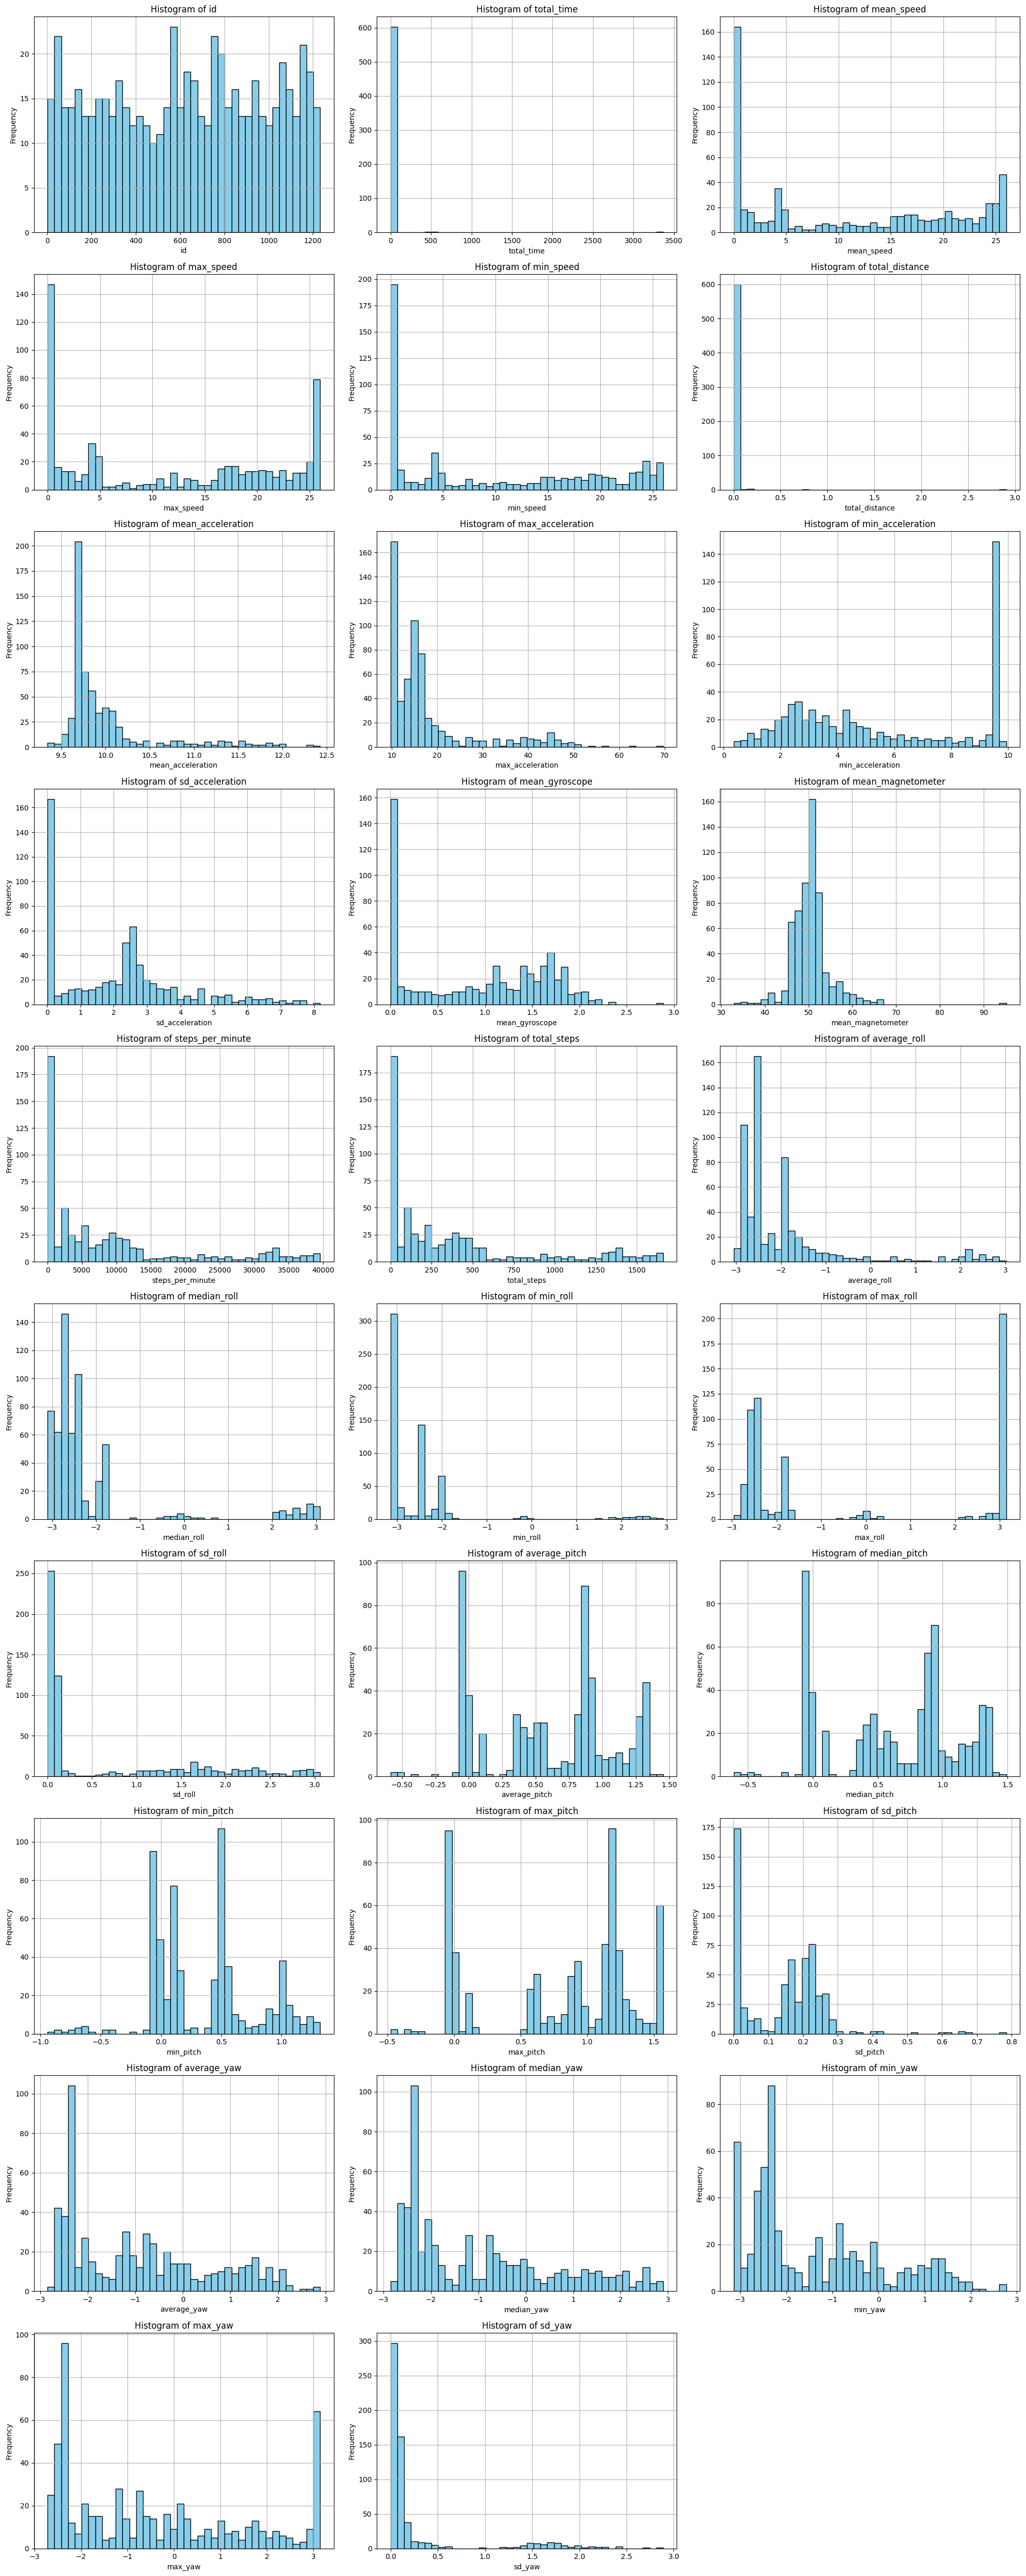

In [62]:
num_columns = len(result.columns)
num_rows = (num_columns + 2) // 3  

fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))
axes = axes.flatten()  

for i, column in enumerate(result.columns):
    axes[i].hist(result[column], bins=40, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Ukrywanie pustych subplotów, jeśli istnieją
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print()
print()


### Heatmap of correlation

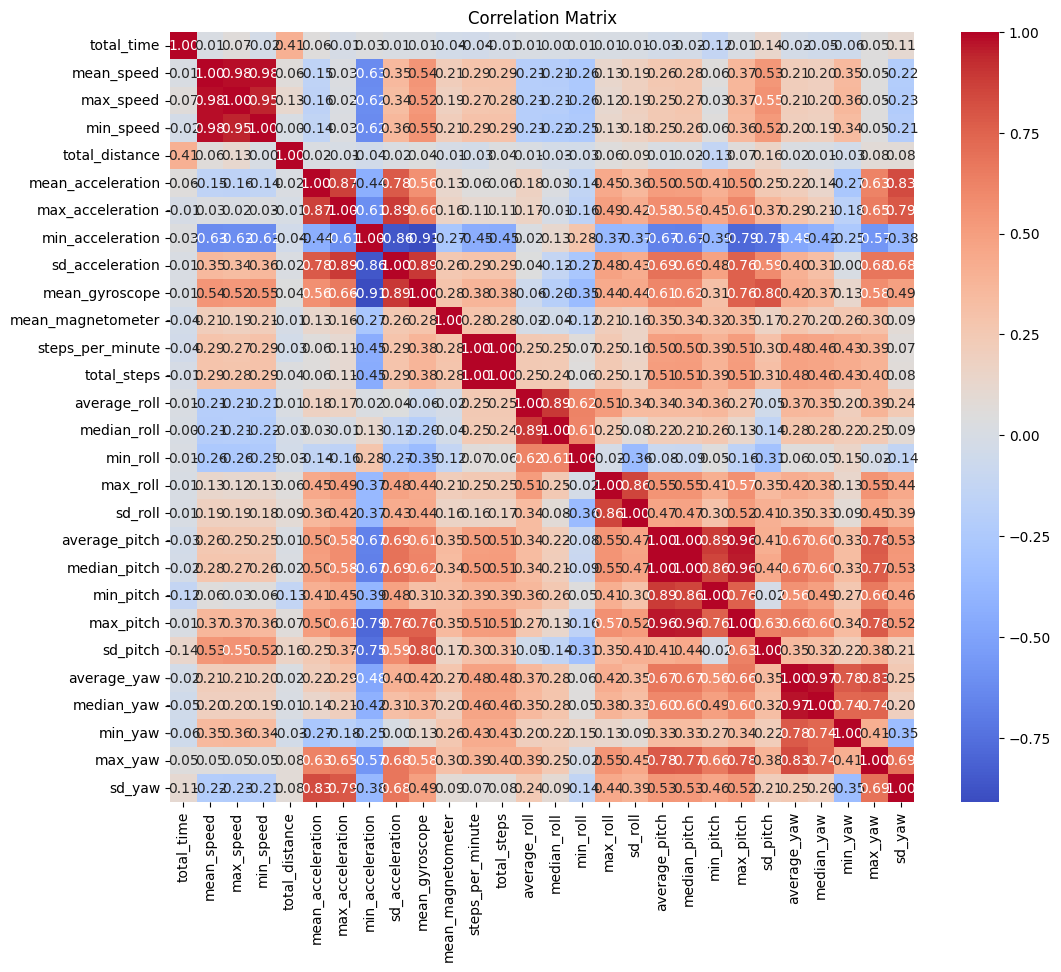

In [63]:
plt.figure(figsize=(12, 10))
sns.heatmap(result.loc[:,result.columns != 'id'].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


### Dropping correlated columns

In [139]:
reduced_result = result.drop(columns=['sd_yaw', 'min_speed', 'total_steps', 'max_speed', 'min_pitch', 'total_distance', 'median_roll', 'max_yaw', 'median_yaw', 'average_yaw', 'sd_pitch', 'max_pitch', 'average_pitch', 'max_acceleration', 'min_acceleration', 'mean_gyroscope', 'max_roll', 'min_roll'])

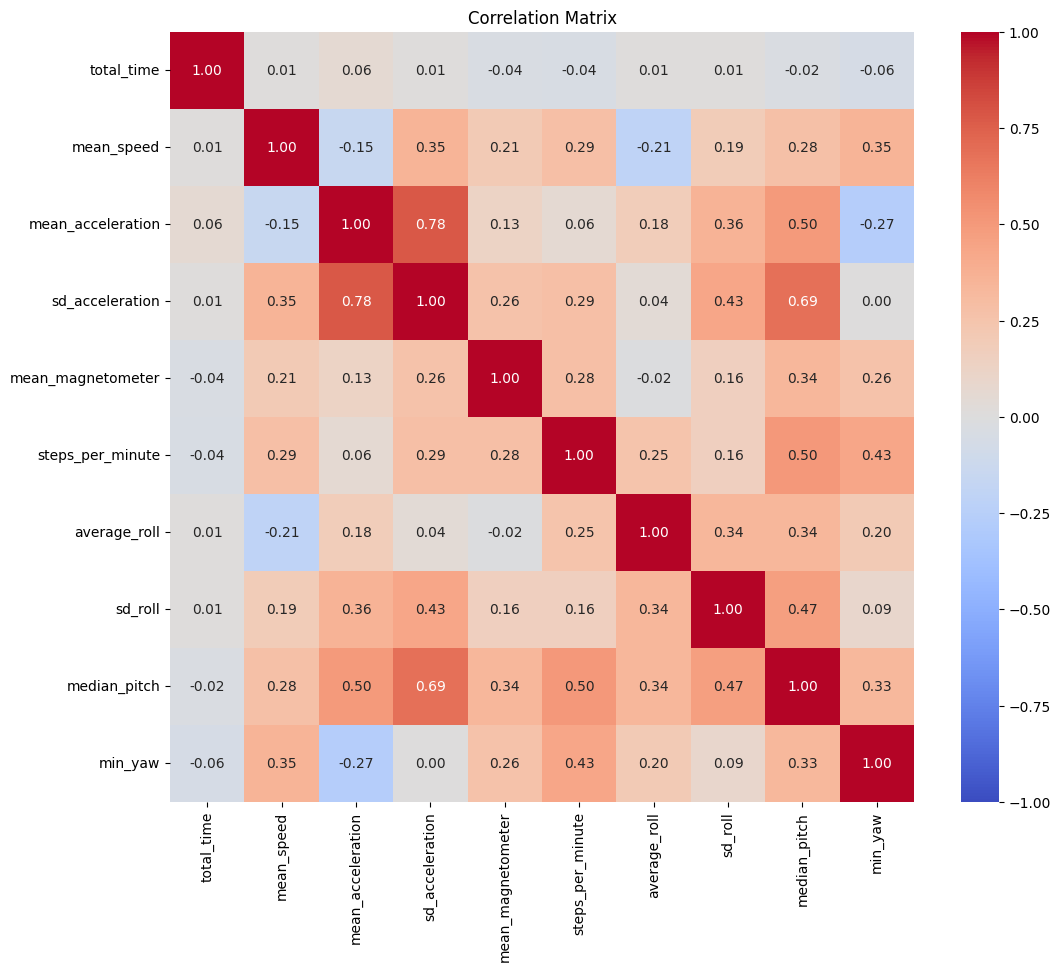

In [140]:
plt.figure(figsize=(12, 10))
sns.heatmap(reduced_result.loc[:, reduced_result.columns != 'id'].corr(), 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            center=0, 
            vmin=-1, 
            vmax=1)
plt.title('Correlation Matrix')
plt.show()

## **Models**

Real labels from dataset.

In [142]:
Y_train = pd.read_csv("..//final_data//Y_train.csv")
real_labels = Y_train['act_type']


We can now drop id from our data frame.

In [141]:
reduced_result.drop(columns=['id'], inplace=True)

### Elbow method

Number of clusters: 2, Inertia: 14868970750.390057
Number of clusters: 3, Inertia: 6034006349.83428
Number of clusters: 4, Inertia: 3223579524.3479953
Number of clusters: 5, Inertia: 2050731187.1162434
Number of clusters: 6, Inertia: 1525260939.6350627
Number of clusters: 7, Inertia: 1198723037.2880843
Number of clusters: 8, Inertia: 806722262.3427068
Number of clusters: 9, Inertia: 592760771.659842
Number of clusters: 10, Inertia: 429779904.5567264


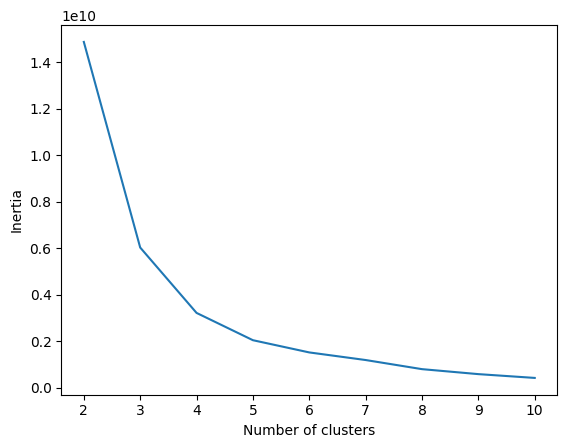

In [143]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(reduced_result)
    labels = kmeans.predict(reduced_result)
    print(f'Number of clusters: {i}, Inertia: {kmeans.inertia_}')
    inertias.append(kmeans.inertia_)
    
plt.plot(range(2, 11), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


### Silhouette score

In [144]:
def count_clustering_scores(X, cluster_num, model, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k,random_state=42)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

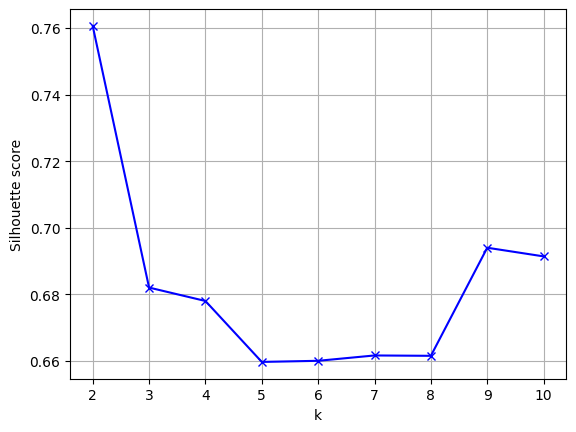

In [145]:
cluster_num_seq = range(2, 11)
silhouette_vec = count_clustering_scores(reduced_result, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.xticks(cluster_num_seq)
plt.grid(True)
plt.show()

### Davies-Bouldin score

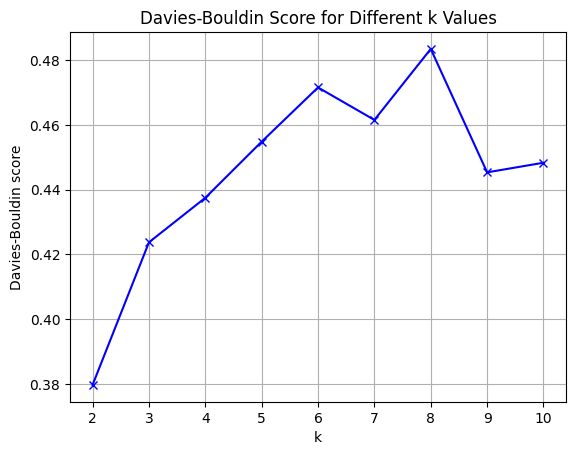

In [146]:
cluster_num_seq = range(2, 11)
#davies_bouldin_vec = count_clustering_scores(df, cluster_num_seq, KMeans, davies_bouldin_score)

davies_bouldin_vec = []
for k in cluster_num_seq:
    kmeans = KMeans(n_clusters=k,random_state=42)
    davies_bouldin_vec.append(davies_bouldin_score(reduced_result, kmeans.fit_predict(reduced_result)))


plt.plot(cluster_num_seq, davies_bouldin_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin Score for Different k Values')
plt.xticks(cluster_num_seq)
plt.grid(True)
plt.show()

### Caliński-Harabasz score

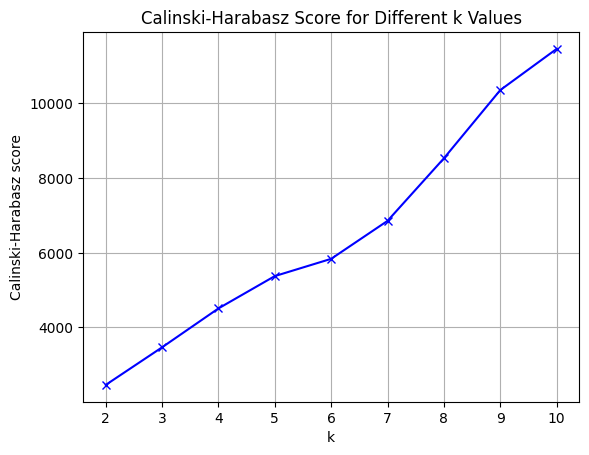

In [147]:
cluster_num_seq = range(2, 11)

calinski_harabasz_vec = count_clustering_scores(reduced_result, cluster_num_seq, KMeans, calinski_harabasz_score)

plt.plot(cluster_num_seq, calinski_harabasz_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Calinski-Harabasz score')
plt.title('Calinski-Harabasz Score for Different k Values')
plt.xticks(cluster_num_seq)
plt.grid(True)
plt.show()

We set n_clusters = 3

In [148]:
n_clusters = 3

In [149]:
real_color_labels = ['yellow' if real_labels.iloc[i] == 0 else 'blue' if real_labels.iloc[i] == 1 else 'green' for i in range(len(real_labels))]
real_color_labels

['yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',

### Function to do KMeans clustering

In [171]:
def doKmeans(X, nclust=n_clusters, xaxis = 2, yaxis = 6, real = False,  multidimensional = False, zaxis = 4):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X).flatten()
    centers = model.cluster_centers_
    
    color_labels = ['yellow' if clust_labels[i] == 0 else 'blue' if clust_labels[i] == 1 else 'green' for i in range(len(clust_labels))]
    
    print(f"Model inertia: {model.inertia_}")
    print("Accuracy: ", np.mean(real_labels == clust_labels))
    print("Silhouette scre:" , silhouette_score(X, clust_labels))
    print("Davies Bouldin Score:" , davies_bouldin_score(X, clust_labels))
    print("Calinski Harabasz Score:" , calinski_harabasz_score(X, clust_labels))
    print()
    
    
    
    # i = 0
    # for label in real_labels:
    #     if label == 0:
    #         plt.scatter(X.iloc[i, 0], X.iloc[i, 1], marker='o', c=color_labels[i], s=50)
    #     elif label == 1:
    #         plt.scatter(X.iloc[i, 0], X.iloc[i, 1], marker='s', c=color_labels[i], s=50)
    #     elif label == 2:
    #         plt.scatter(X.iloc[i, 0], X.iloc[i, 1], marker='^', c=color_labels[i], s=50)
    #     i += 1
    
        
    plt.scatter(X.iloc[:, xaxis], X.iloc[:, yaxis], marker='o', c=color_labels, s=50, cmap='viridis')

    plt.scatter(centers[:, xaxis], centers[:, yaxis], c='red', s=200, alpha=0.75, marker='X')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('K-means Clustering with Centroids')
    plt.show()
    
    if real:
        plt.scatter(X.iloc[:, xaxis], X.iloc[:, yaxis], marker='o', c=real_color_labels, s=50, cmap='viridis')

        plt.scatter(centers[:, xaxis], centers[:, yaxis], c='red', s=200, alpha=0.75, marker='X')

        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('K-means Clustering with Centroids')
        plt.show()
        
    if multidimensional:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Scatter plot for data points
        ax.scatter(X.iloc[:, xaxis], X.iloc[:, yaxis], X.iloc[:, zaxis], c=color_labels, s=50, cmap='viridis')

        # Scatter plot for centroids
        ax.scatter(centers[:, xaxis], centers[:, yaxis], centers[:, zaxis], c='red', s=200, alpha=0.75, marker='X')

        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Feature 3')
        ax.set_title('K-means Clustering with Centroids')

        plt.show()
        
    if multidimensional & real:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Scatter plot for data points
        ax.scatter(X.iloc[:, xaxis], X.iloc[:, yaxis], X.iloc[:, zaxis], c=real_color_labels, s=50, cmap='viridis')

        # Scatter plot for centroids
        ax.scatter(centers[:, xaxis], centers[:, yaxis], centers[:, zaxis], c='red', s=200, alpha=0.75, marker='X')

        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Feature 3')
        ax.set_title('K-means Clustering with Centroids')

        plt.show()

### Tests

Basic

Model inertia: 6034006349.83428
Accuracy:  0.2809917355371901
Silhouette scre: 0.6820399950151502
Davies Bouldin Score: 0.42374692814169895
Calinski Harabasz Score: 3467.752677518488



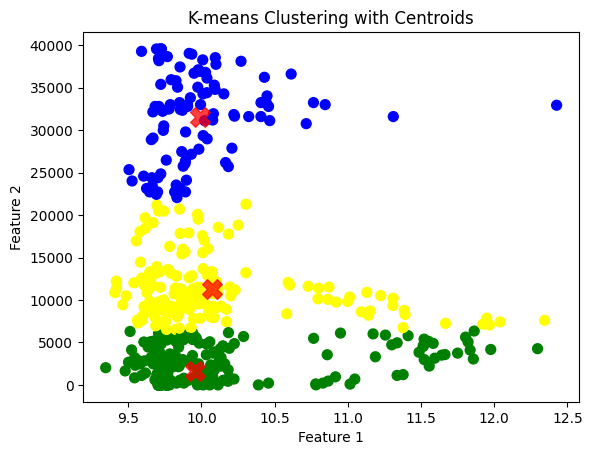

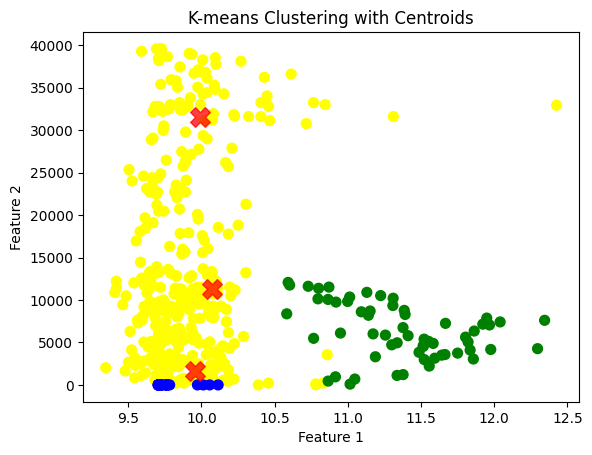

In [172]:
x = reduced_result.copy()
doKmeans(x, n_clusters, 2, 5, True)


Standarization

Model inertia: 3926.1796755860564
Accuracy:  0.09421487603305785
Silhouette scre: 0.3286885276793181
Davies Bouldin Score: 1.3542204968062677
Calinski Harabasz Score: 162.82237963375277



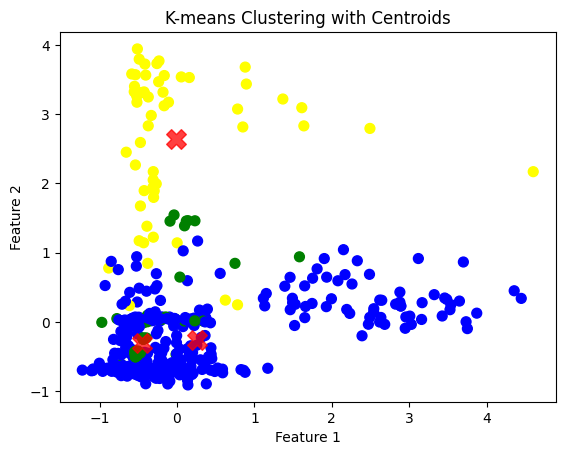

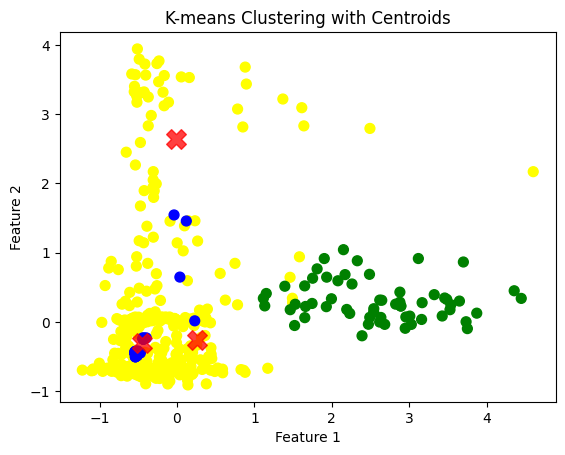

In [173]:
x = reduced_result.copy()
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x, columns=reduced_result.columns)
doKmeans(x, n_clusters, 2, 6, True)


Normalization

Model inertia: 1.171440698285779
Accuracy:  0.8942148760330578
Silhouette scre: 0.9760625473302388
Davies Bouldin Score: 0.08487728345099356
Calinski Harabasz Score: 60057.891516953256



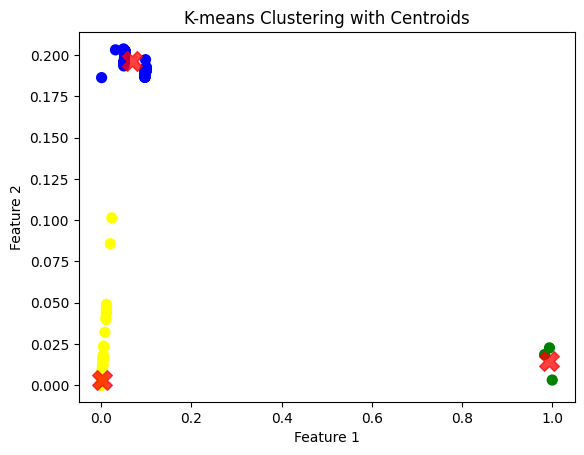

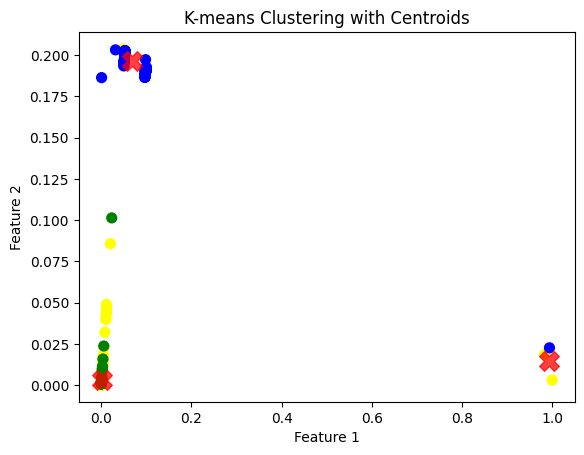

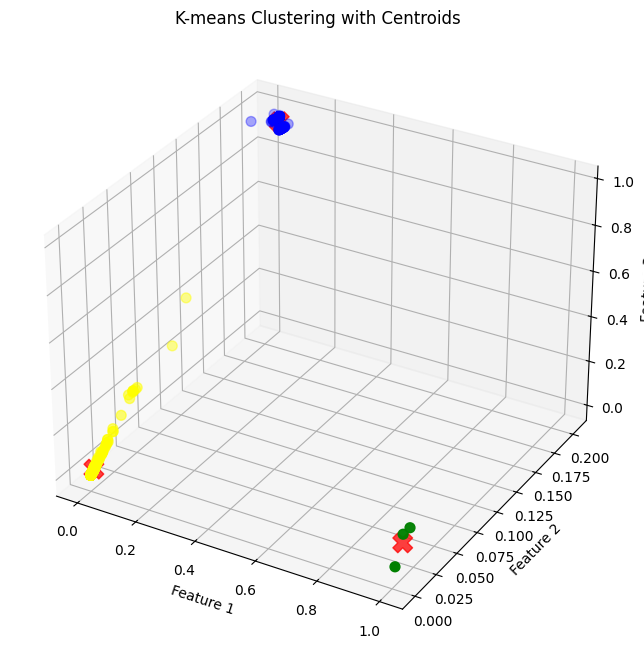

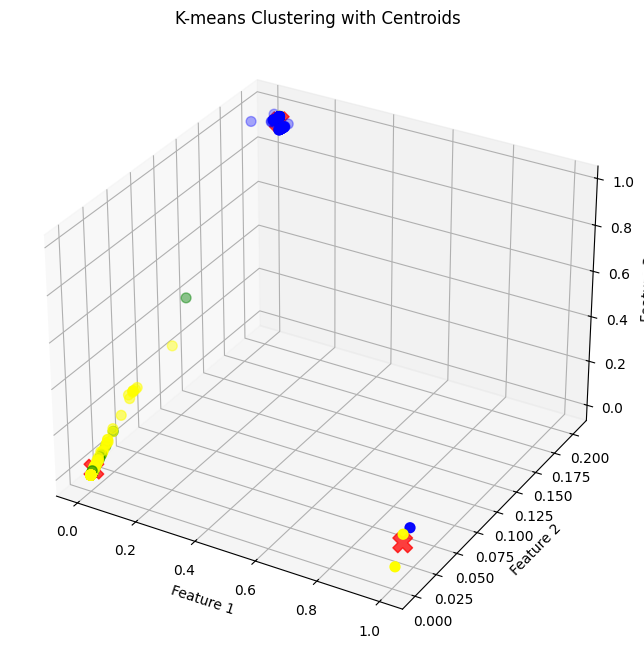

In [177]:
x = reduced_result.copy()
normalizer = Normalizer()
x = normalizer.fit_transform(x)
x = pd.DataFrame(x, columns=reduced_result.columns)
doKmeans(x, n_clusters, 0, 2, True, True)

Normalization + standarization

Model inertia: 317.4225146238107
Accuracy:  0.15867768595041323
Silhouette scre: 0.359267882421412
Davies Bouldin Score: 1.5185145915578655
Calinski Harabasz Score: 264.61349760889544



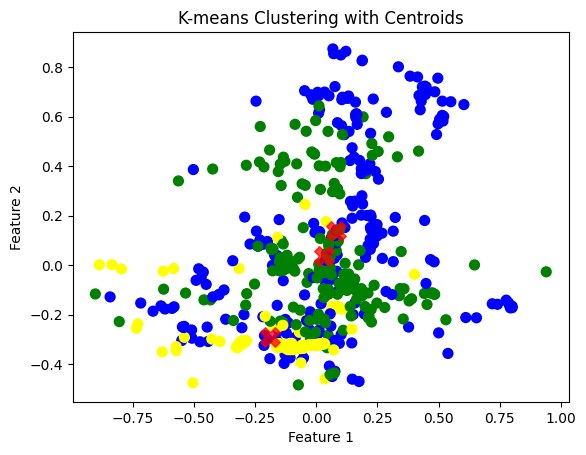

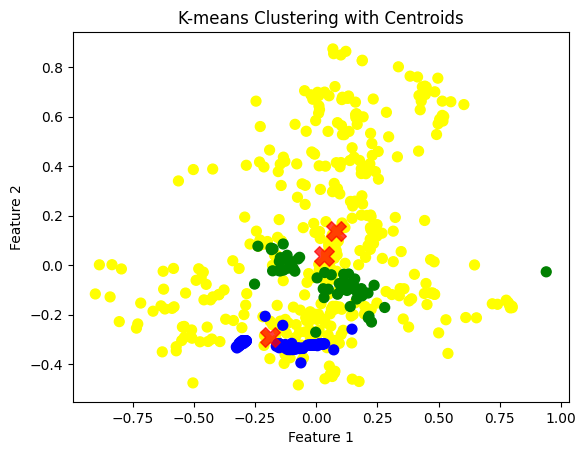

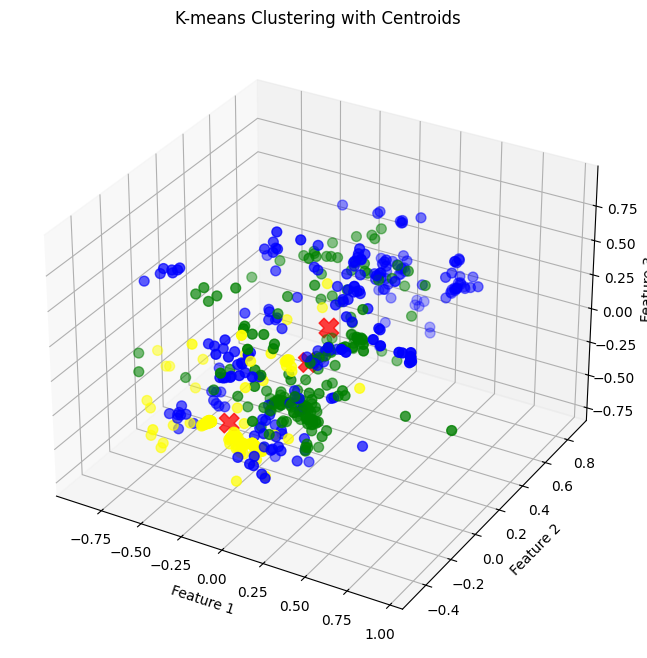

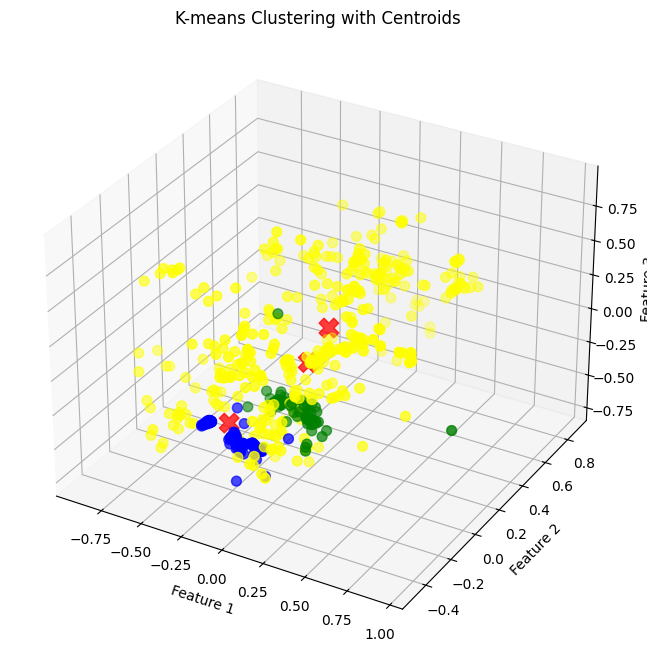

In [180]:
x = reduced_result.copy()
normalizer = Normalizer()
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = normalizer.fit_transform(x)
x = pd.DataFrame(x, columns=reduced_result.columns)
doKmeans(x, n_clusters, 4, 5, True, True, 9)

PowerTransformer

Model inertia: 2785.5321976951504
Accuracy:  0.4925619834710744
Silhouette scre: 0.371467806028853
Davies Bouldin Score: 1.3960188659883326
Calinski Harabasz Score: 287.3776900357218



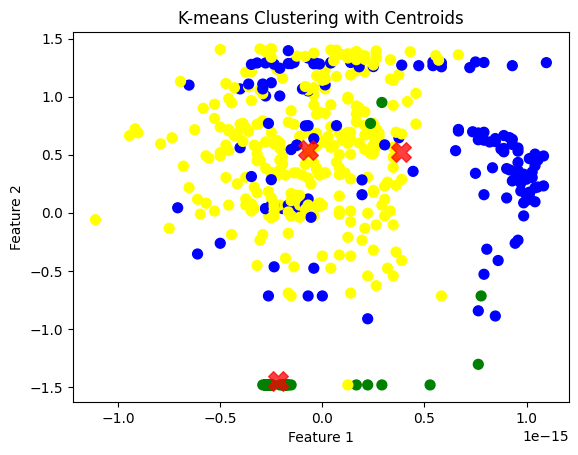

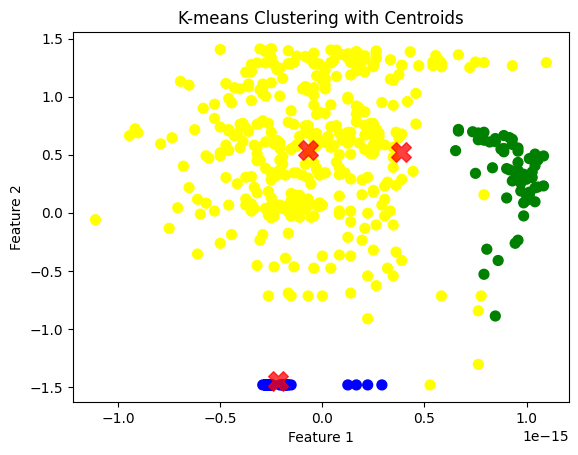

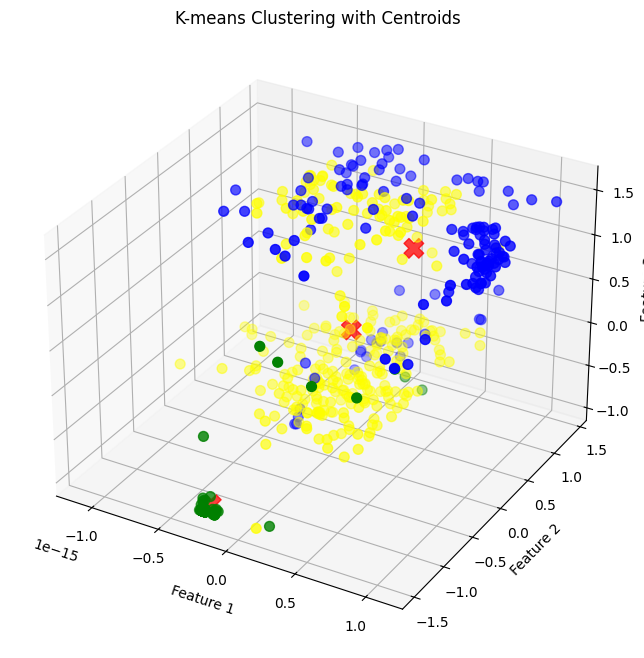

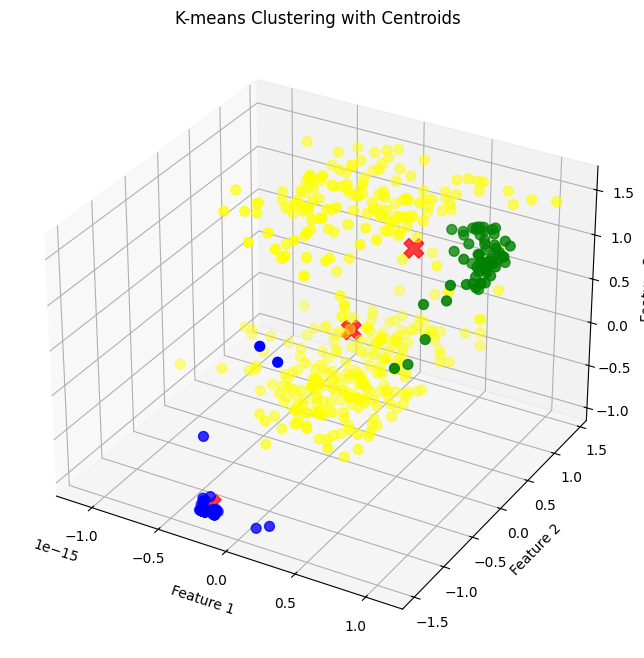

In [188]:
x = reduced_result.copy()
powerTransformer = PowerTransformer()
x = powerTransformer.fit_transform(x)
x = pd.DataFrame(x, columns=reduced_result.columns)
doKmeans(x, n_clusters, 2, 5, True, True, 7)

### PCA

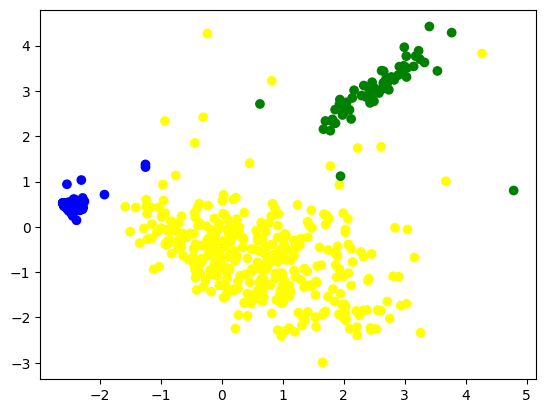

Model inertia: 835.4050107555703
Accuracy:  0.828099173553719
Silhouette scre: 0.4758264977281125
Davies Bouldin Score: 0.9363471852001982
Calinski Harabasz Score: 352.9522662258068



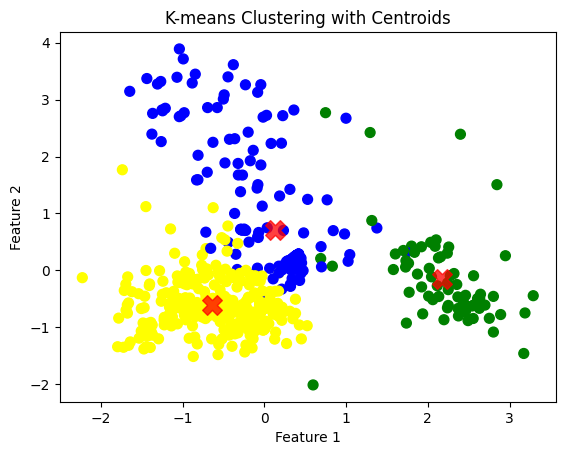

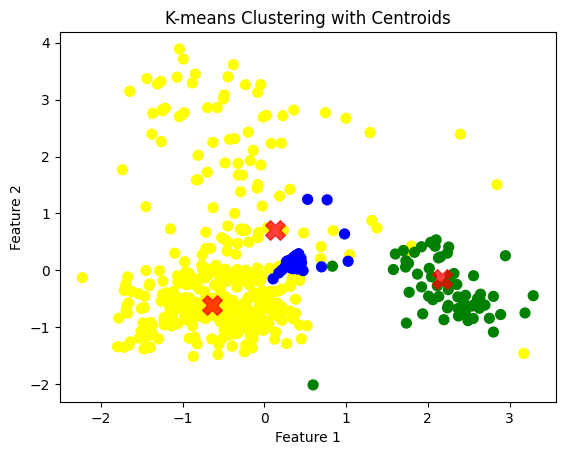

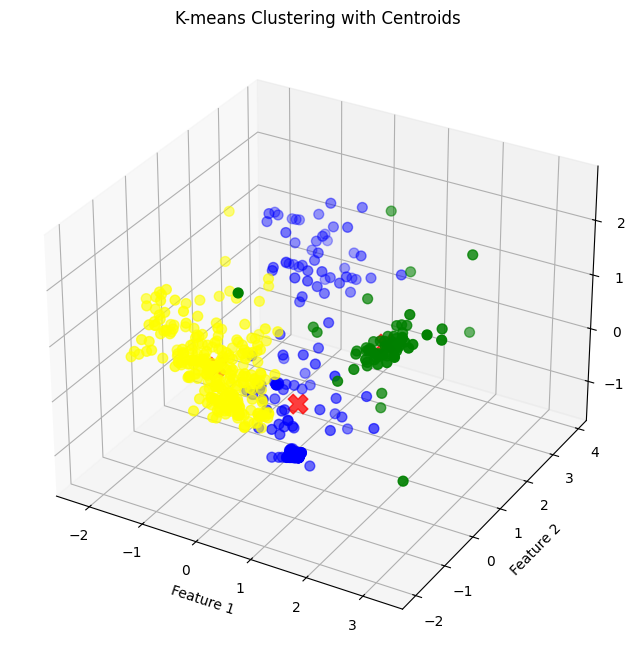

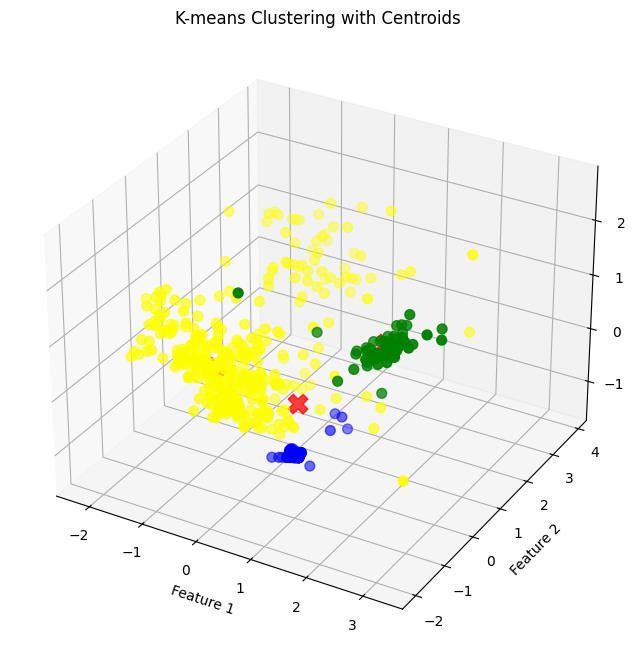

In [207]:
scaler = StandardScaler()
x = reduced_result.copy()
x = scaler.fit_transform(x)

model = PCA(n_components=3)
transformed = model.fit_transform(x)
xs = transformed[:,0]
ys = transformed[:,1]
x = pd.DataFrame(transformed)
scaler2 = StandardScaler()
x = scaler2.fit_transform(x)
x = pd.DataFrame(x)
plt.scatter(xs,ys,c=real_color_labels)  
plt.show()
doKmeans(x, n_clusters, 1, 2, True, True, 0)

### Explained variance for PCA

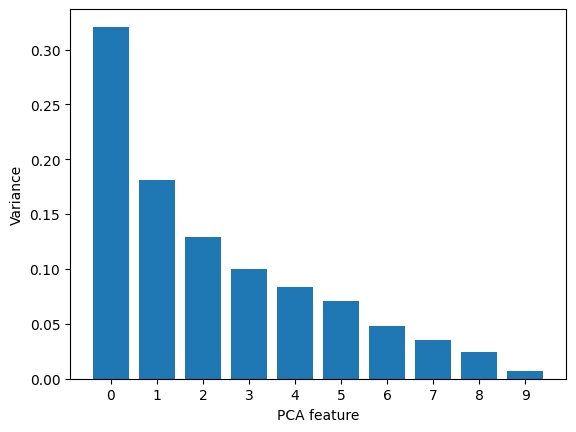

In [208]:
x = reduced_result.copy()
scaler = StandardScaler()

x = scaler.fit_transform(x)
model = PCA()
model.fit(x)

features = range(model.n_components_)
plt.bar(features, model.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.show()


### TSNE

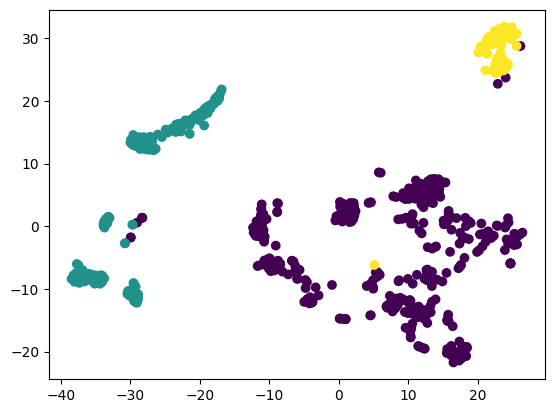

In [215]:
scaler = StandardScaler()


x = reduced_result.copy()
x = scaler.fit_transform(x)

model = TSNE(learning_rate=100)
transformed = model.fit_transform(x)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=real_labels)
plt.show()